In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

# 1. Simple, hand-made

## a. simple linear model

In [13]:
x_train = np.array([[1],[2]],dtype= np.float32)
y_train = np.array([[300],[500]],dtype= np.float32)

Text(0.5, 0, 'size')

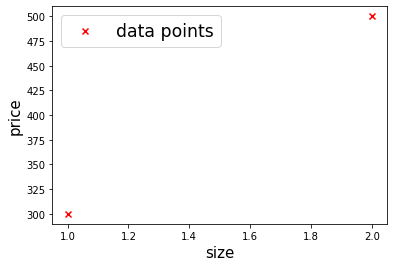

In [20]:
# visualize
plt.scatter(x_train, y_train, marker="x", c = 'r', label = 'data points')
plt.legend(fontsize='xx-large')
#plt.xlabel('size', fontsize= 15)
plt.ylabel('price', fontsize = 15)

ax=plt.gca()
ax.set_xlabel('size', fontsize=15)


In [21]:
#
linear_model = Dense(units=1, activation='linear')

In [22]:
# check weights will get nothing
linear_model.get_weights()

[]

In [24]:
# now give it a value, it will instantiate weights
# value must be 2d
linear_model(x_train[0].reshape(1,1))
linear_model.get_weights()

[array([[-1.261416]], dtype=float32), array([0.], dtype=float32)]

In [25]:
# later on, we can give it all values that are train values (2d), it will return the predicted values. 
# so it acts like a function with input is 2d

In [27]:
# i need other weights as I like
# w must be 2d
set_w = np.array([[200]])
set_b = np.array([100])


# desired weights are put in a list
linear_model.set_weights([set_w, set_b])

In [28]:
# check back, it must be as expected
linear_model.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

In [29]:
# now this time for prediction
linear_model(x_train)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

In [31]:
# compare with usual computation
np.dot(x_train, set_w) + set_b

array([[300.],
       [500.]])

In [34]:
# note that get_weights() gives a list, so we can write
a,b = linear_model.get_weights()
print(f"w={a},b={b}" )

w=[[200.]],b=[100.]


## b. Logistic regression using tf

In [37]:
x_train = np.arange(0,6).reshape(-1,1)
y_train = np.array([0,0,0,1,1,1])

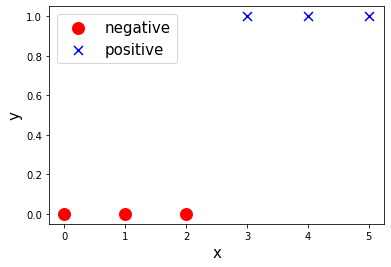

In [50]:
# visualize
positive = y_train == 1
negative = y_train == 0

plt.scatter(x_train[negative], y_train[negative], marker='o',s=100,c='red', label ='negative', facecolors= 'none', lw = 3)
plt.scatter(x_train[positive], y_train[positive], marker='x',s=80,c='blue', label ='positive')
plt.gca().set_xlabel('x', size = 15)
plt.gca().set_ylabel('y', size = 15)
plt.legend(fontsize=15)

In [63]:
# set input_dim = 1 helps build model, so that call .summary() works. This is equivalent to feed model a value
model = Sequential(
    [
        Dense(1, input_dim = 1, activation = 'sigmoid', name = 'layer1')
    ]
)

In [64]:
# check model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [65]:
# take out one layer to work
logistic_layer = model.get_layer('layer1')

In [69]:
# it is already instantiated, because of input_dim = 1
logistic_layer.get_weights()

[array([[0.752123]], dtype=float32), array([0.], dtype=float32)]

In [70]:
# set new weights
set_w = np.array([[3]])
set_b = np.array([7])
logistic_layer.set_weights([set_w,set_b])

In [71]:
# check back
logistic_layer.get_weights()

[array([[3.]], dtype=float32), array([7.], dtype=float32)]

In [73]:
# compute some values
logistic_layer(x_train[1].reshape(-1,1))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9999546]], dtype=float32)>

In [74]:
# compute the whole x_train
logistic_layer(x_train)

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[0.99908894],
       [0.9999546 ],
       [0.99999774],
       [0.9999999 ],
       [1.        ],
       [1.        ]], dtype=float32)>

In [75]:
# model can predict as well
model.predict(x_train)

1/1 [==============================] - 0s 146ms/step


array([[0.99908894],
       [0.9999546 ],
       [0.99999774],
       [0.9999999 ],
       [1.        ],
       [1.        ]], dtype=float32)